In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = train.iloc[:, 1:2].values

In [24]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [25]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [27]:
regressor = Sequential()

In [28]:
regressor.add(LSTM(units = 30, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

In [29]:
regressor.add(LSTM(units = 30, return_sequences= True))
regressor.add(Dropout(0.1))

In [30]:
regressor.add(LSTM(units = 30, return_sequences= True))
regressor.add(Dropout(0.1))

In [31]:
regressor.add(LSTM(units = 30))
regressor.add(Dropout(0.1))

In [32]:
regressor.add(Dense(units = 1))

In [33]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [34]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 94ms/step - loss: 0.0570
Epoch 2/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0057
Epoch 3/100
38/38 [==============================] - 4s 108ms/step - loss: 0.0055
Epoch 4/100
38/38 [==============================] - 4s 104ms/step - loss: 0.0046
Epoch 5/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0043
Epoch 6/100
38/38 [==============================] - 3s 92ms/step - loss: 0.0042
Epoch 7/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0037
Epoch 8/100
38/38 [==============================] - 4s 92ms/step - loss: 0.0038
Epoch 9/100
38/38 [==============================] - 4s 94ms/step - loss: 0.0038
Epoch 10/100
38/38 [==============================] - 4s 119ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0035
Epoch 13/100
38/38 

In [35]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [36]:
dataset_total = pd.concat((train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range (60,80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


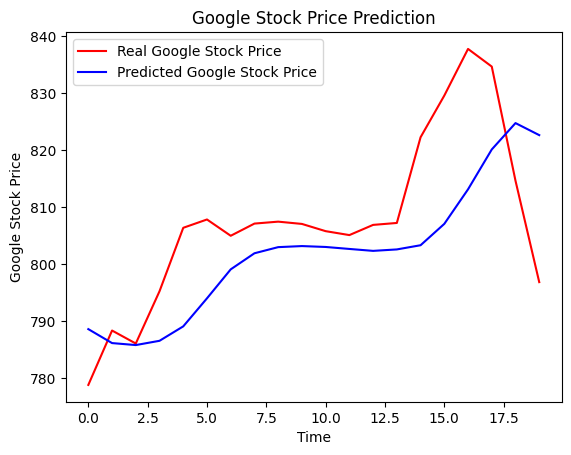

In [37]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()